# GetYourMusicStyle Classifier

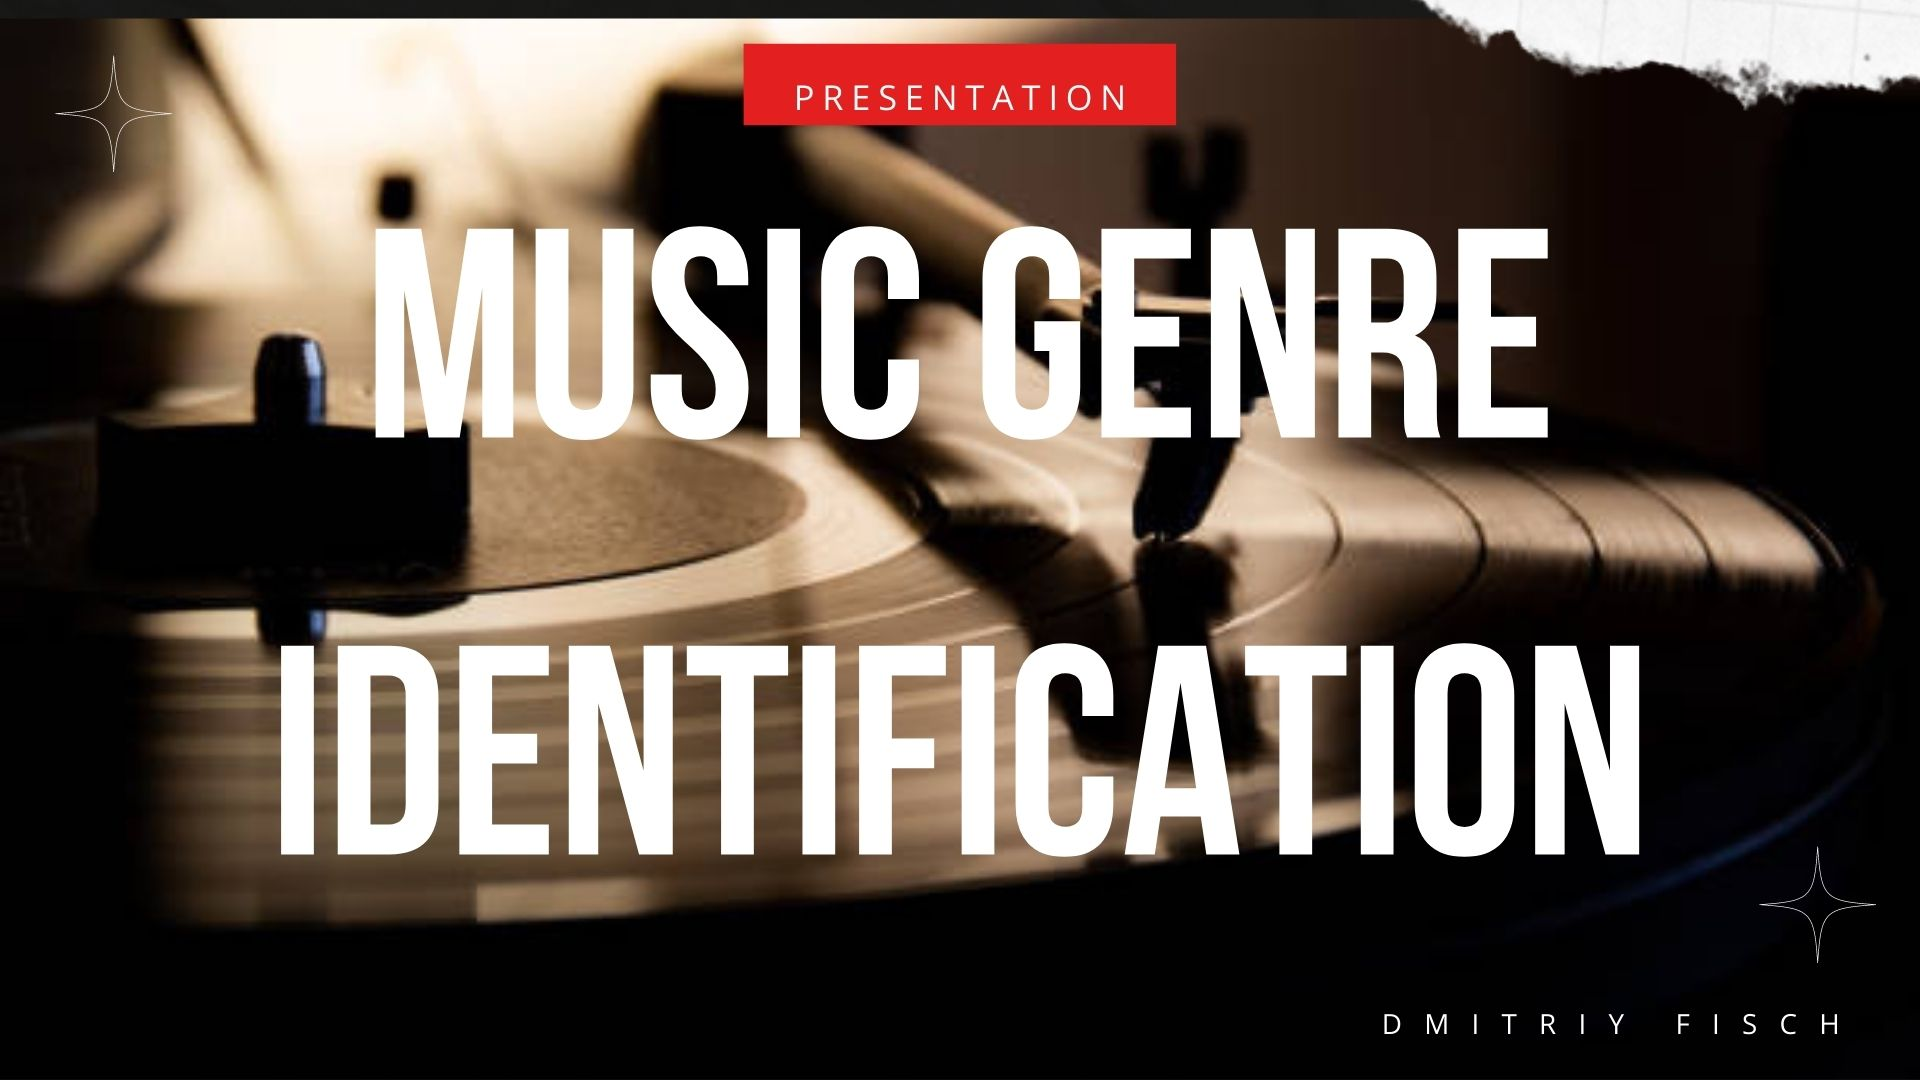

Being a musician and a music lover gave me some necessary domain knowledge to create this project:

* You are at a live performance and would like to find music of  the same genre?
* Your friend just recorded a cool demo and you want to find similar bands?
* You are  trying to identify a recording they play in a coffee shop, but Shazam cannot find it,  
and you are interested in discovering something  that sounds alike?

## Objectives:

The goal of this effort is to create a tool that:
* performs music genre classification
* displays visualization of genre influences and how it is distributed during a music sample duration
* recommends music of the same genre
***

1. ### DATA UNDERSTANDING and DATASET PREPARATION

2. ### IDENTIFYING and EXTRACTING FEATURES

 - **features for regular NN as well as XGBoost**
 - **images for CNN  (spectragrams)**

3. ### MODELS

4. ### CLASSIFICAITON TOOL BASED ON MOST SUCCESFUL MODEL(S)

5. ### PROOF OF CONCEPT DEMO RECOMMENDATION SYSTEM



***
## 1. DATA UNDERSTANDING and DASET PREPARATION
***

* One of the significant challenges of this project was getting a good training dataset with proper genre labels. The standard option was the GTZAN music dataset (avaiable on kaggle.com), that is the most-used public dataset for evaluation in machine listening research for music genre recognition. But as mentioned in a [paper by Bob L. Sturm
](https://arxiv.org/pdf/1306.1461v2.pdf) it has significant faults: genres are mislabeled, lots of repetetions, only 1000 samples based on less than 300 songs, noisy recordings, etc. After exploring the dataset, I decided to avoid using it and ended up creating my own dataset based on my own music collection as well as some publically available Youtube mixes/lists.  


* Almost 2,000 recorded musical pieces of 14 genres were selected
    
    
* Each raw music file was cut in 30 second chunks totalling to 4,700 sample files. On average 2-3 chunks per each of the 2000 music files are included in the dataset
  
  
* The first 30 seconds of each file were skipped to exclude intros.
  
  
* Only the most representative excerpts were selected to make sure that dataset consists of typical genres examples as much as possible  
  
  
* The detailed code of the dataset creation is beyond the scope of this repository. In the future I plan to add more genres and selections.


***  
## 2. IDENTIFYING AND EXTRACTING FEATURES


***
* A detailed feature exploration and visualizations are included in 'EDA and Features Exploring.ipynb'  


* src/generate_features.py script (takes several hours to execute) was used to generate features and spectrograms (see the details below)  


* Here are some key points for feature extractions:

### Two Approaches:

After an initial load of an audio file:  **x , sr = librosa.load(audio_file)** :

1. **Numeric Features extraction:** Using various transformations over **x** extract chosen features and store them in a CSV file together with the genre labels. This CSV file will be used in model training (regular NN or models like XGBoost)  


2. **Spectrograms generation:** Instead of extracting numeric features, we can generate a spectrogram image of a sound. Such spectrogram visualizes the signal strength over time at various frequencies. A model can be trained directly using images/spectrograms (good for CNN network training) 

#### 1. Numeric Feature Extraction


* librosa library was used for feature extraction


* Initially 7 characteristics were chosen: rmse, chroma_shft, central_centroid, central_rolloff, central_bandwidth, Zero Crossing Rate, and 20 mfcc channels. Also cqt and tonnets were considered.  


* After several iterations of testing the following was chosen:  
* * 13 mfcc channels, 7 spectral_contrasts channels,  
* * the  means of: spectral_bandwidth, zero_crossing_rate, chroma_shft, and rmse for both harmonic and percussive wave split.  

Below is a full feature list and their importance report (as generated by XGBoost model at a later modeling stage):

<img src="EDA/feature_importance.png" alt="drawing" width="1000"/>

#### 2. Spectrogram Images generation:

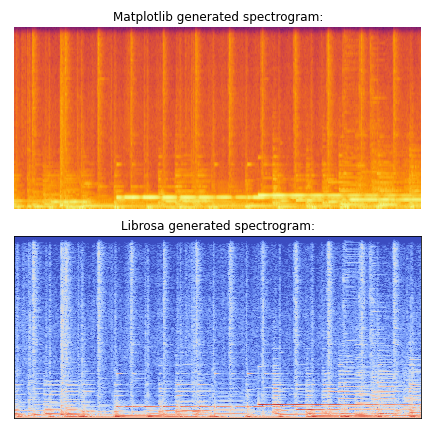

For CNN model after trying different spcectrograms visualizations  
log transformations were performed in librosa to make it more readable for CNN model:  
* librosa.display.specshow(ampl, x_axis='time',  y_axis='log')  

<img src="EDA/log_spectrograms2.png" alt="drawing" width="500"/>


***
# 3. MODELING
***

* Three notebooks  (XGB.ipynb, NN.ipynb, CNN.ipynb) have all the training/evaluation details

Quick Overview of the process:

## XGB and NN models

* The features/features.csv file - is used to load features/target for training/evaluating  


* OPTIONALLY: features.csv can be regenerated by running src/generate_features.py (uncomment: extract = 'FEATURES' at the top of the script)  might takes several hours to complete the process  


* Accuracy of 96% (for NN model) and 92% (for XGBooster model) is achieved  (please check corresponding notebooks for the details)

Here is training process for NN: 

<img src="EDA/learning curve NN.JPG" alt="drawing" width="400"/>

**Further details about modeling are in corresponding XGB.ipynb and NN.ipynb notebooks**

## CNN model

* GPU enironment in Google Collab was used for training  

* OPTIONALLY: all the images can be regenerated by running src/generate_features.py (uncomment: extract = 'IMAGES' at the top of the script)  

* (100 x 100, 23,000+ images,  6 seconds span  

* Best models are saved in models folder

* Accuracy of 86% (for CNN) was achieved. Further improvements are possible if adding more samples.

* This model was not chosen for classifier tool as it requires further tuning and is still overfitted:

<img src="EDA/learning curve.JPG" alt="drawing" width="400"/>